In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


%matplotlib inline


import preprocessing

In [21]:
user_health = preprocessing.load_users_health()
food_pref = preprocessing.load_food_pref_dataset()

In [22]:
scaler = StandardScaler()
users = scaler.fit_transform(user_health.drop('seqn', axis=1))

In [23]:
users

array([[-1.32323607, -0.6904095 , -1.3270265 , ..., -0.64677014,
        -0.40663881,  1.96339396],
       [ 0.80022577, -0.2594959 ,  1.22576875, ..., -1.1398077 ,
        -1.52650154, -0.47869043],
       [-0.04297037, -0.5885572 ,  0.35377433, ...,  0.26626238,
         0.15329255,  2.14655029],
       ...,
       [ 1.25276682,  0.40646149,  1.27631915, ..., -0.9206799 ,
        -0.37716874,  4.31390019],
       [ 0.11948026,  1.00974054, -0.32865608, ...,  0.22974108,
        -0.43610889, -1.02815942],
       [-0.64635844,  0.31244398, -0.85943529, ...,  0.12017718,
        -1.34968111, -1.54710235]])

In [25]:
user_health.head()

,seqn,weight,height,bmi,upper_leg_length,upper_arm_length,arm_circumference,waist_circumference,hip_circumference,systolic,diastolic,pulse
0,109264.0,42.2,154.7,17.6,36.3,33.8,22.7,63.8,85.000000,108.000000,67.000000,93.333333
1,109266.0,97.1,160.2,37.8,40.8,34.7,35.8,117.9,126.100000,99.000000,54.333333,66.666667
2,109270.0,75.3,156.0,30.9,42.6,36.1,31.0,91.4,105.696877,124.666667,73.333333,95.333333
3,109271.0,98.8,182.3,29.7,40.1,42.0,38.2,120.4,108.200000,107.000000,67.000000,71.333333
4,109273.0,74.3,184.2,21.9,41.0,41.1,30.2,86.8,94.500000,113.666667,67.333333,70.333333


In [26]:
merged = pd.merge(user_health, food_pref, on='seqn')[['seqn', 'usda_food_code']]

In [27]:
user_food = pd.crosstab(merged['seqn'], merged['usda_food_code'])

In [28]:
user_food.head()

usda_food_code,11100000,11111000,11112110,11112210,11113000,11114300,11114320,11114330,11114350,11115300,...,95312900,95313200,95320200,95320500,95321000,95322200,95322500,95323000,95330100,95342000
seqn,,,,,,,,,,,,,,,,,,,,,
109264.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109266.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109270.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109273.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:


pca = PCA(n_components=3)
pca.fit(user_food)
pca_samples = pca.transform(user_food)

ps = pd.DataFrame(pca_samples)
tocluster = pd.DataFrame(ps[[0,1,2]])
ps.head()

,0,1,2
0,-0.948704,-0.410377,-0.175503
1,-0.956271,-0.438121,-0.070148
2,0.035329,-0.495773,0.246066
3,-0.982311,0.424400,-0.182637
4,-0.959986,-0.448213,0.268362


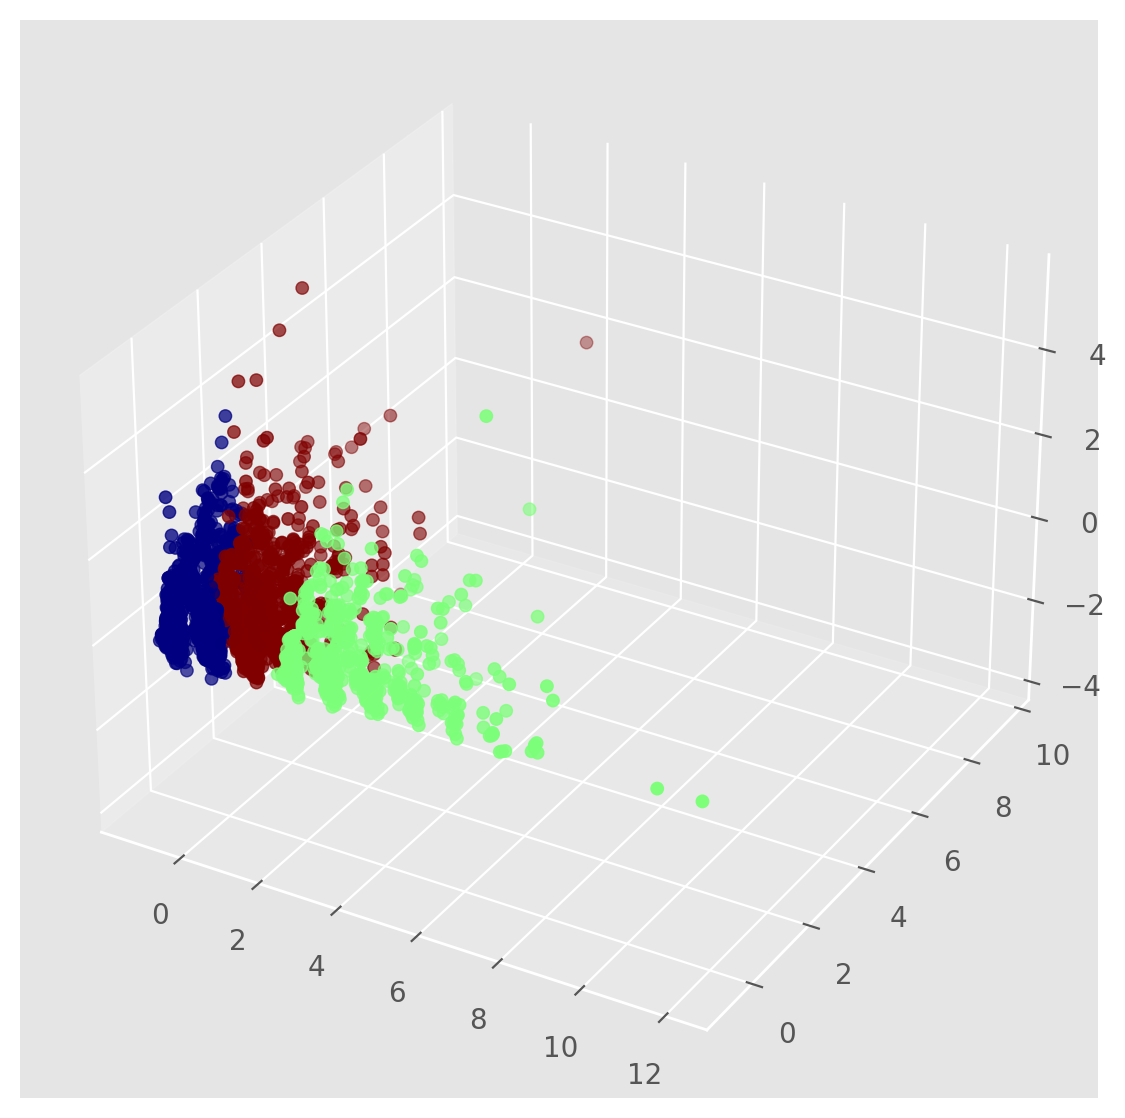

In [116]:
model = KMeans(n_clusters=3, init='k-means++', n_init=1)
model.fit(tocluster)

predicted = model.predict(tocluster)


plt.rcParams['figure.figsize'] = (10, 7)


fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=predicted, cmap="jet")
plt.show()

In [29]:


pca = PCA(n_components=3)
pca.fit(users)
pca_samples = pca.transform(users)

In [42]:
ps = pd.DataFrame(pca_samples)
tocluster = pd.DataFrame(ps[[0,1,2]])
ps.head()

,0,1,2
0,-3.533536,-0.213437,0.114156
1,1.313182,1.517243,-2.196181
2,-0.037742,0.373740,0.178671
3,2.198568,-0.725590,-1.375926
4,0.062801,-2.190110,-0.726669


In [62]:
scores = []
inertia_list = np.empty(8)

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=1)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

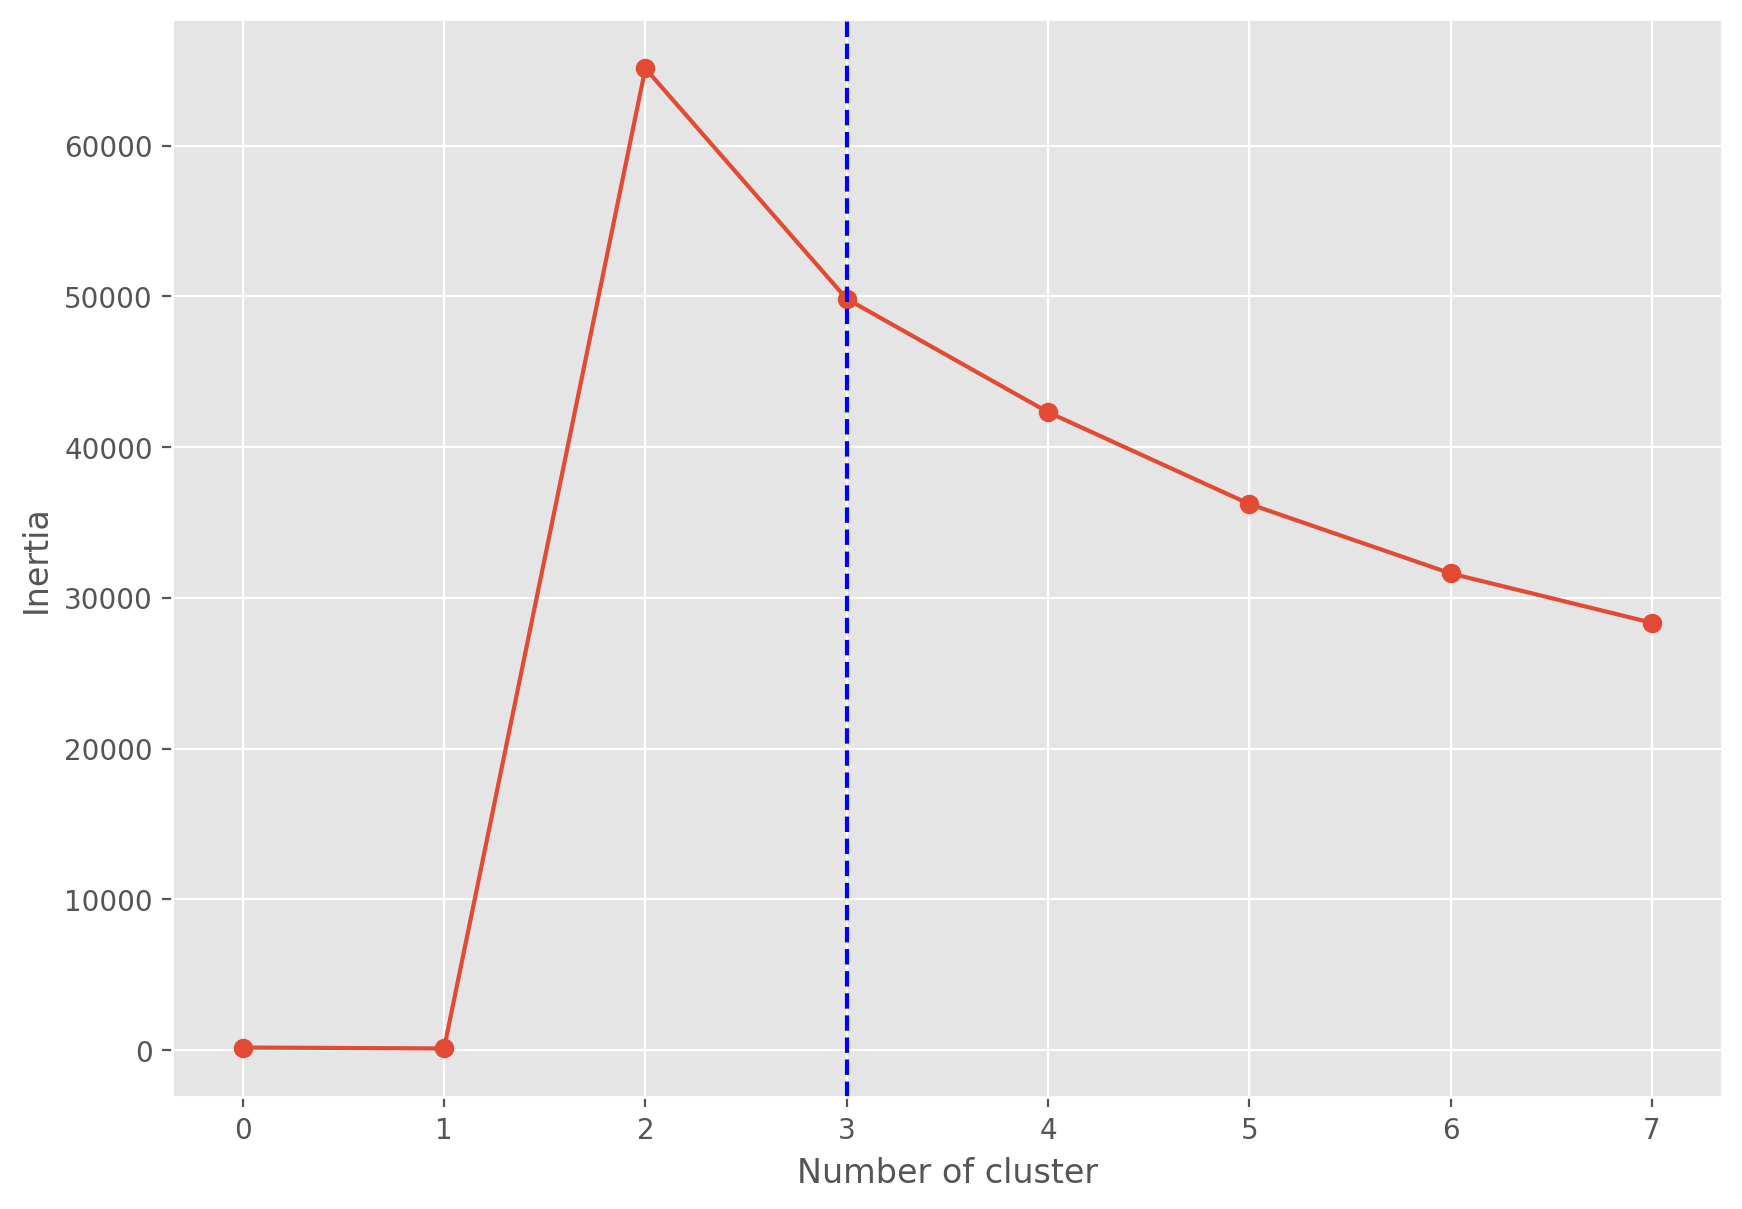

In [63]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=3, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

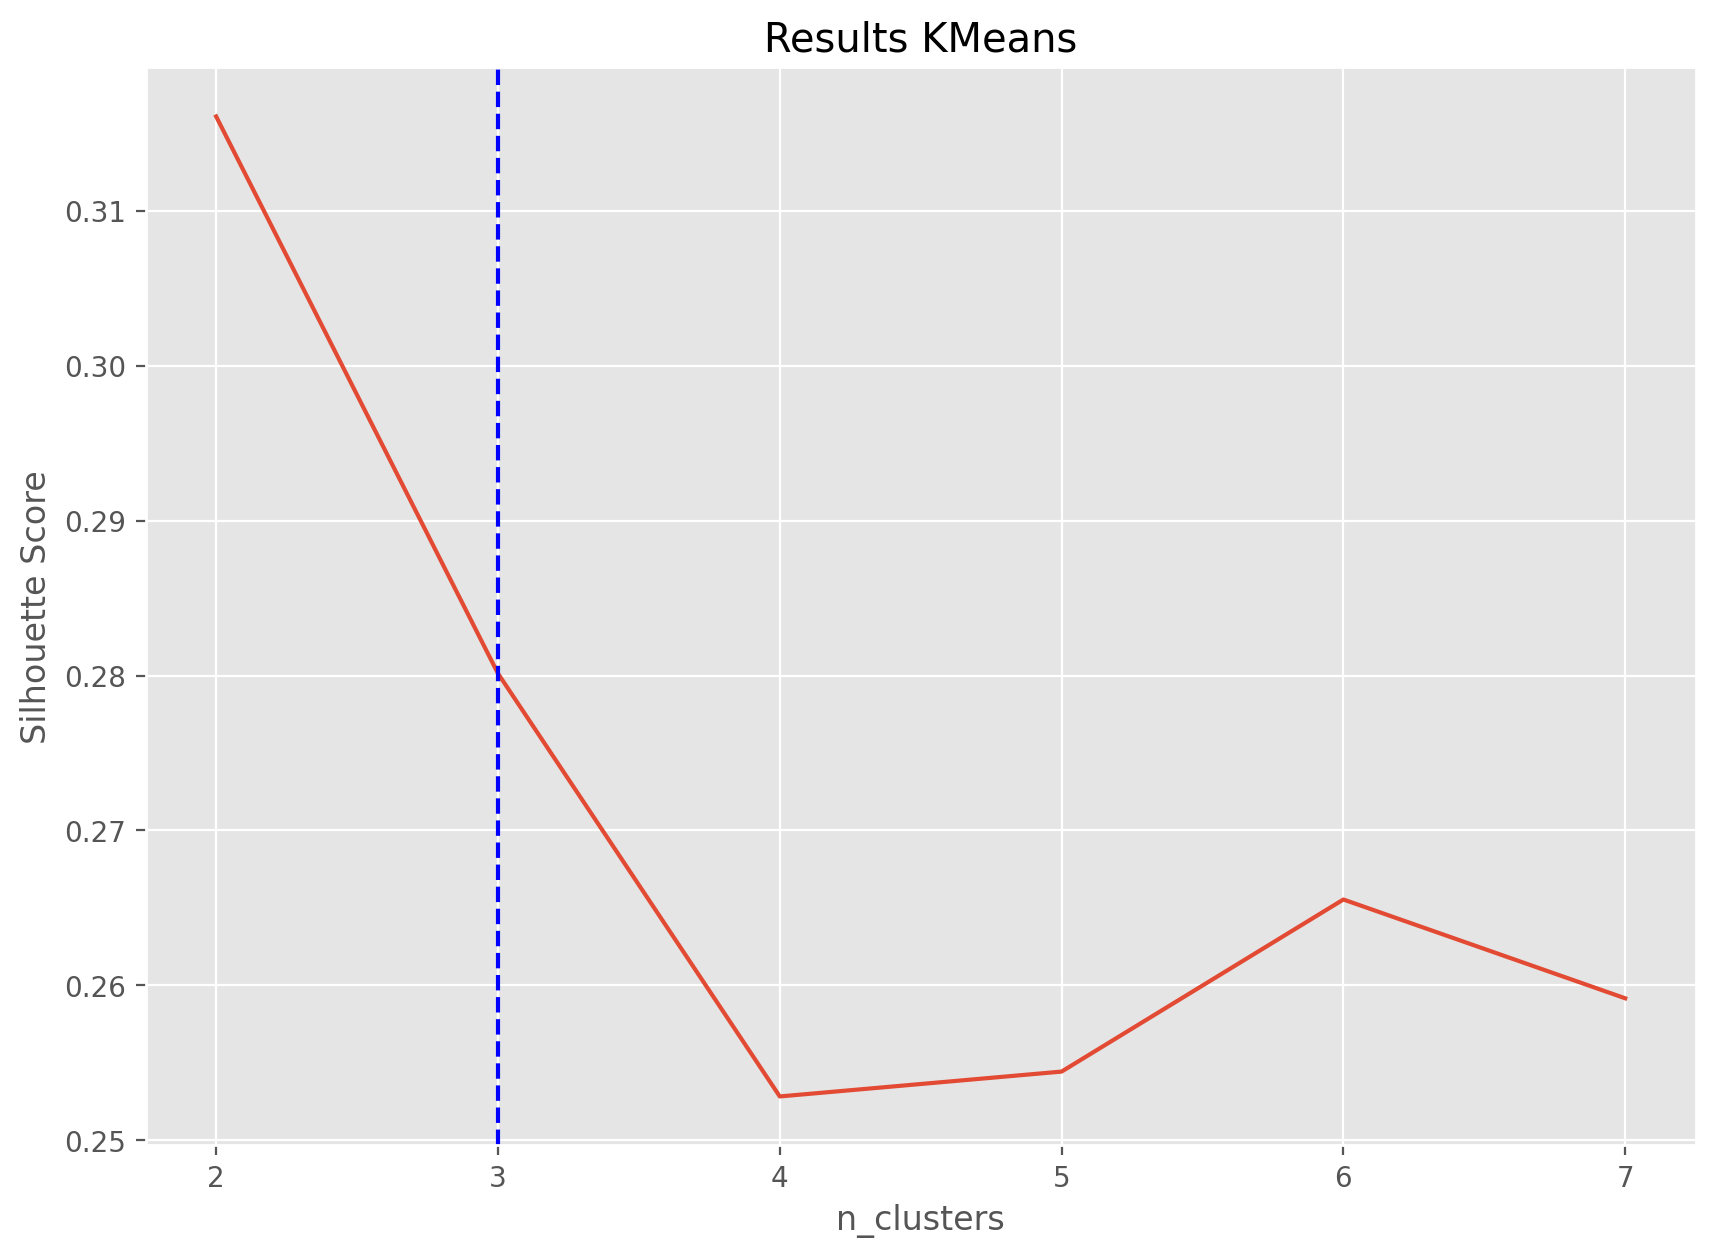

In [64]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=3, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [66]:
model = KMeans(n_clusters=3, init='k-means++', n_init=1)
model.fit(tocluster)

KMeans(n_clusters=3, n_init=1)

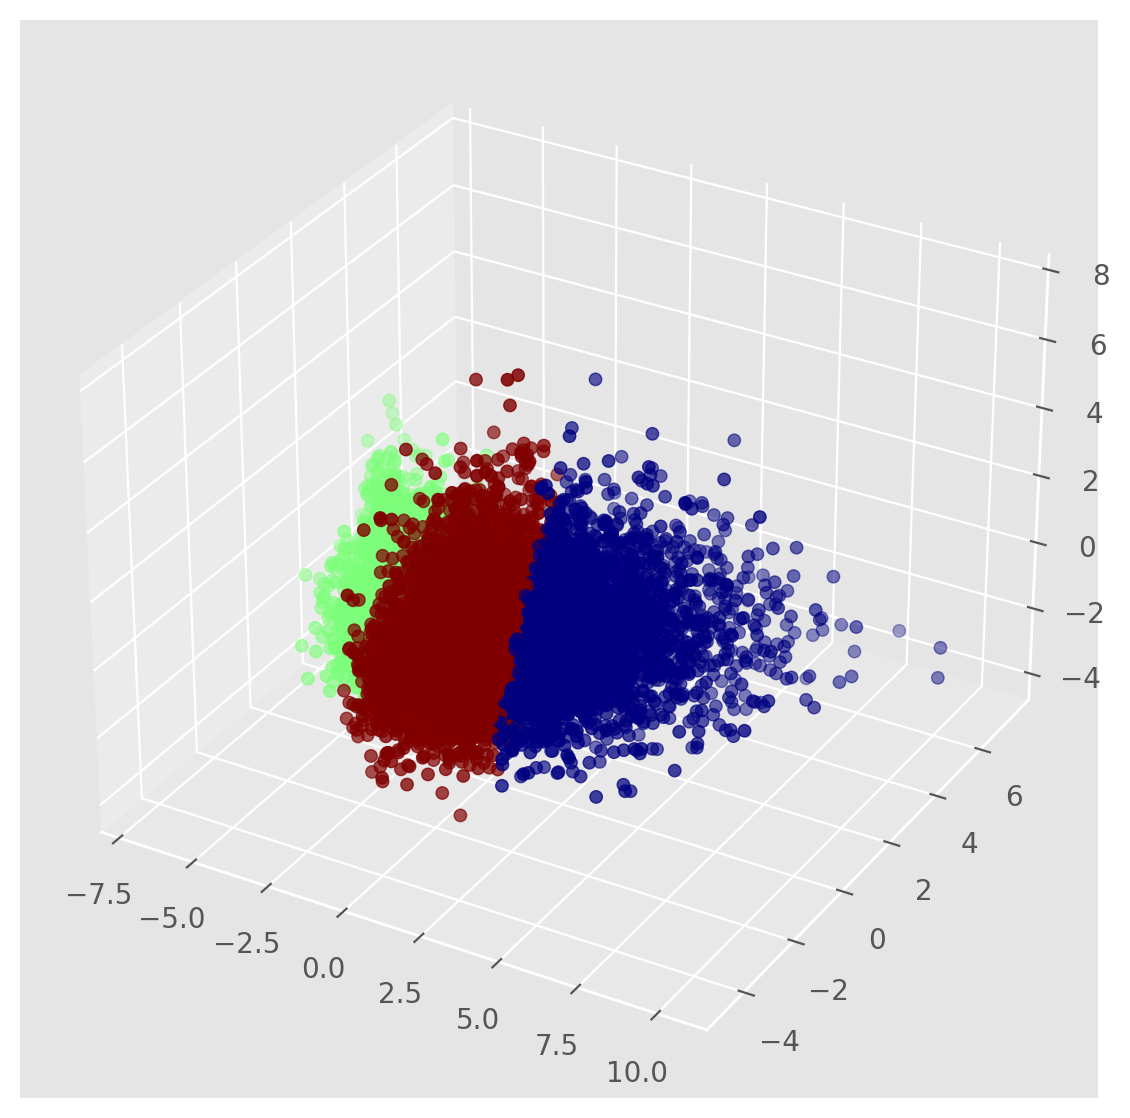

In [68]:
predicted = model.predict(tocluster)


plt.rcParams['figure.figsize'] = (10, 7)


fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(tocluster[0], tocluster[1], tocluster[2], c=predicted, cmap="jet")
plt.show()

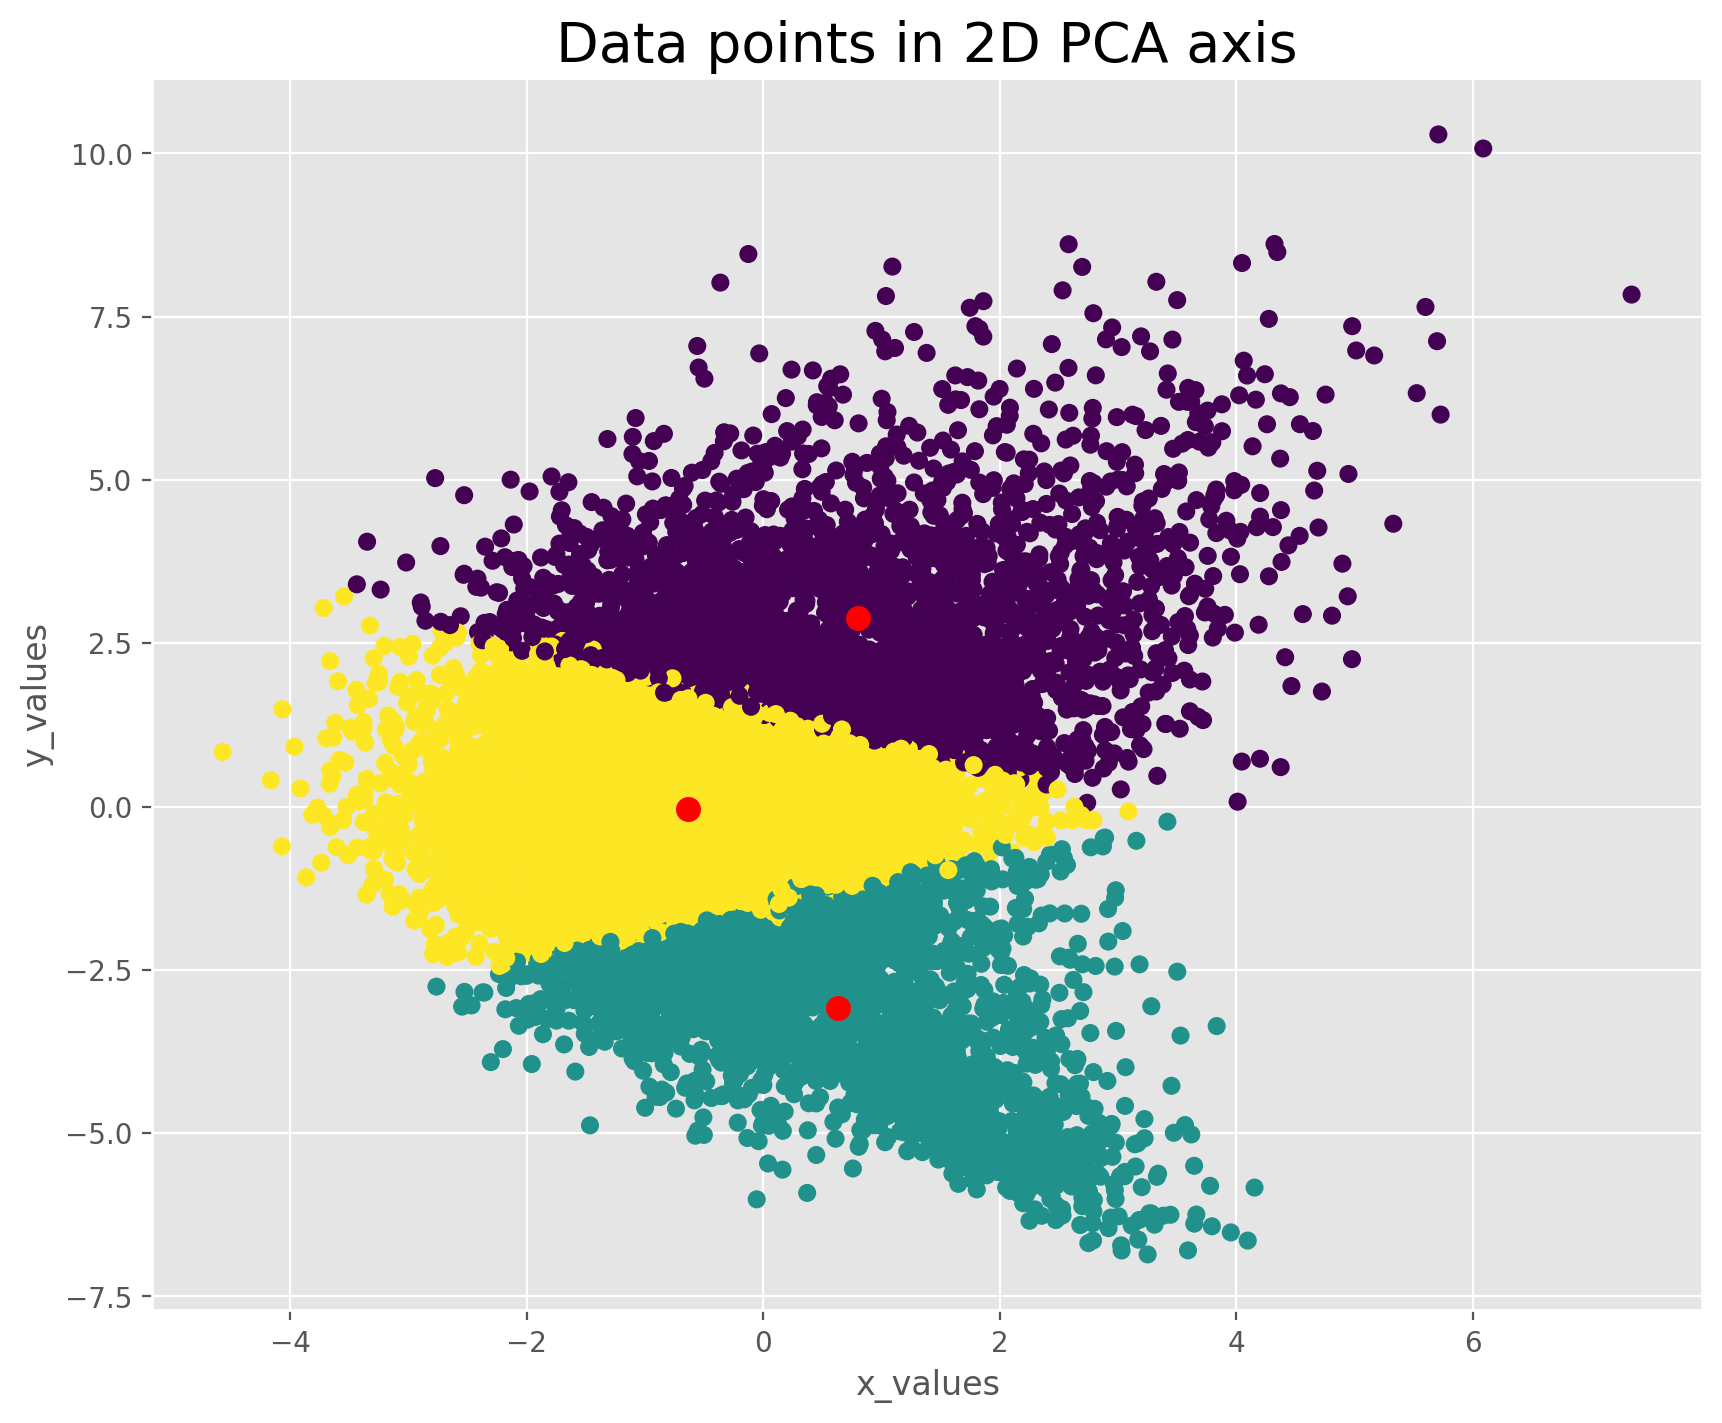

In [69]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = predicted)
for ci,c in enumerate(model.cluster_centers_):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [71]:
cols = ["grams",
        "energy_kcal",
        "protein_gm",
        "carbohydrate_gm",
        "total_sugar_gm",
        "dietary_fiber_gm",
        "total_fat_gm",
        "total_saturated_fatty_acids_gm",
        "total_monounsaturated_fatty_acids_gm",
        "total_polyunsaturated_fatty_acids_gm",
        "cholesterol_mg",
        "vitamin_e_mg",
        "added_alpha_tocopherol_mg",
        "retinol_mcg",
        "vitamin_a_rae_mcg",
        "alpha_carotene_mcg",
        "beta_carotene_mcg",
        "beta_cryptoxanthin_mcg",
        "lycopene_mcg",
        "lutein_zeaxanthin_mcg",
        "thiamin_mg",
        "riboflavin_mg",
        "niacin_mg",
        "vitamin_b6_mg",
        "total_folate_mcg",
        "folic_acid_mcg",
        "food_folate_mcg",
        "dietary_folate_equivalents_mcg",
        "total_choline_mg",
        "vitamin_b12_mcg",
        "added_vitamin_b12_mcg",
        "vitamin_c_mg",
        "vitamin_d_d2_d3_mcg",
        "vitamin_k_mcg",
        "calcium_mg",
        "phosphorus_mg",
        "magnesium_mg",
        "iron_mg",
        "zinc_mg",
        "copper_mg",
        "sodium_mcg",
        "potassium_mg",
        "selenium_mcg",
        "caffeine_mg",
        "theobromine_mg",
        "alcohol_gm",
        "moisture_gm",
        "sfa_butanoic_gm",
        "sfa_hexanoic_gm",
        "sfa_octanoic_gm",
        "sfa_decanoic_gm",
        "sfa_dodecanoic_gm",
        "sfa_tetradecanoic_gm",
        "sfa_hexadecanoic_gm",
        "sfa_octadecanoic_gm",
        "mfa_hexadecenoic_gm",
        "mfa_octadecenoic_gm",
        "mfa_eicosenoic_gm",
        "mfa_docosenoic_gm",
        "pfa_octadecadienoic_gm",
        "pfa_octadecatrienoic_gm",
        "pfa_octadecatetraenoic_gm",
        "pfa_eicosadienoic_gm",
        "pfa_eicosatrienoic_gm",
        "pfa_docosapentaenoic_gm",
        "pfa_docosahexaenoic_gm"]


In [72]:
ss = StandardScaler()
foods = food_pref[cols]

In [73]:
scaled_foods = ss.fit_transform(foods)

In [76]:
pca = PCA(n_components=3)
pca.fit(scaled_foods)
pca_samples = pca.transform(scaled_foods)
food_ps = pd.DataFrame(pca_samples)
food_tocluster = pd.DataFrame(food_ps[[0,1,2]])
food_ps.head()

,0,1,2
0,0.707754,-0.966273,0.451083
1,2.636493,-1.711709,0.474389
2,0.707755,-0.966278,0.451078
3,-0.616806,-0.473179,0.430950
4,0.189739,-0.773360,0.449598


In [107]:
model = KMeans(n_clusters=5, init='k-means++', n_init=1)
model.fit(food_tocluster)

KMeans(n_clusters=5, n_init=1)

In [110]:
predicted = model.predict(food_tocluster)

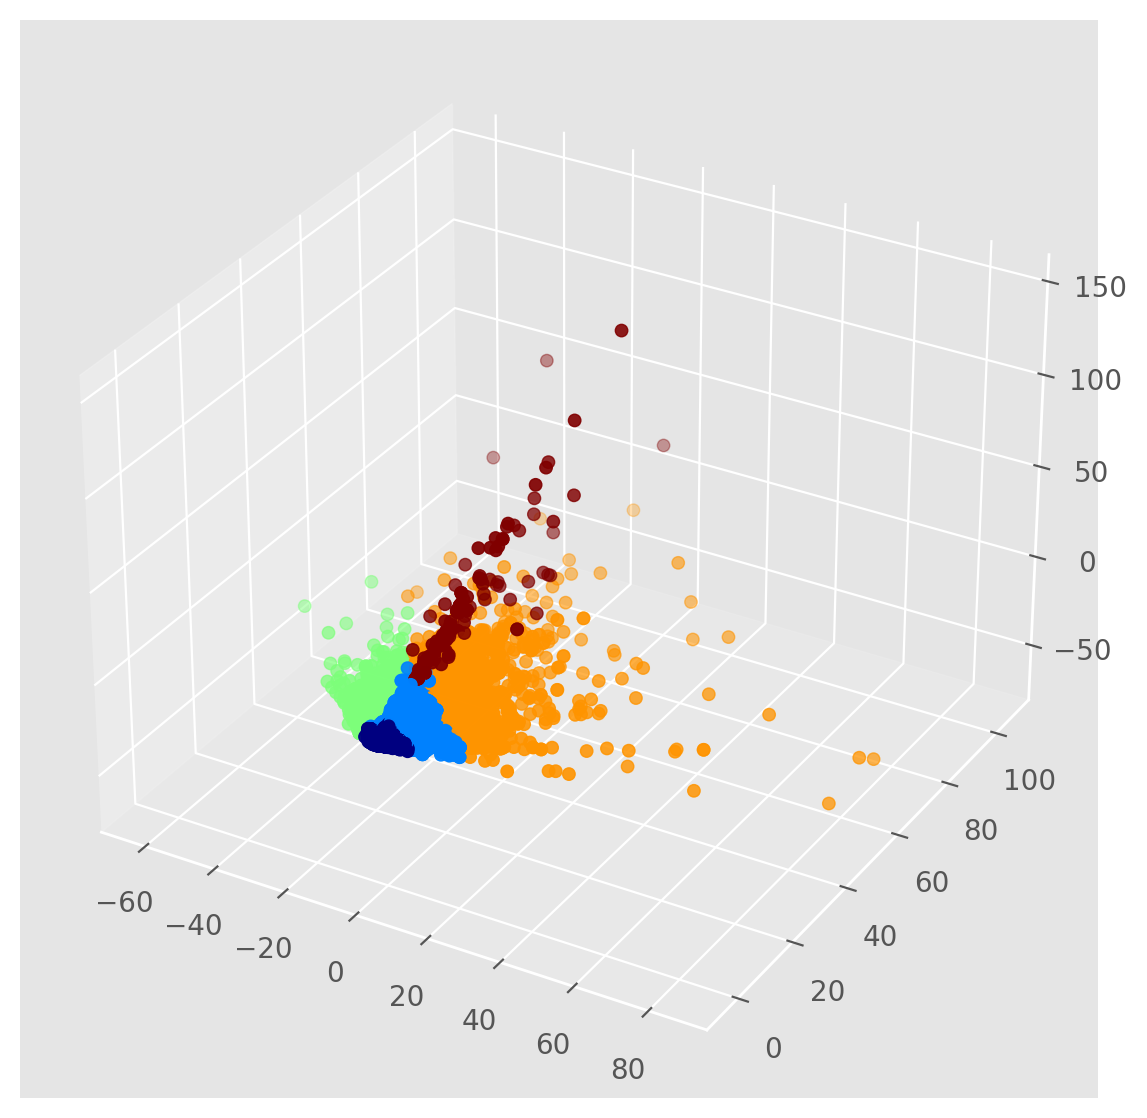

In [111]:

plt.rcParams['figure.figsize'] = (10, 7)


fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(food_tocluster[1], food_tocluster[0], food_tocluster[2], c=predicted, cmap="jet")
plt.show()

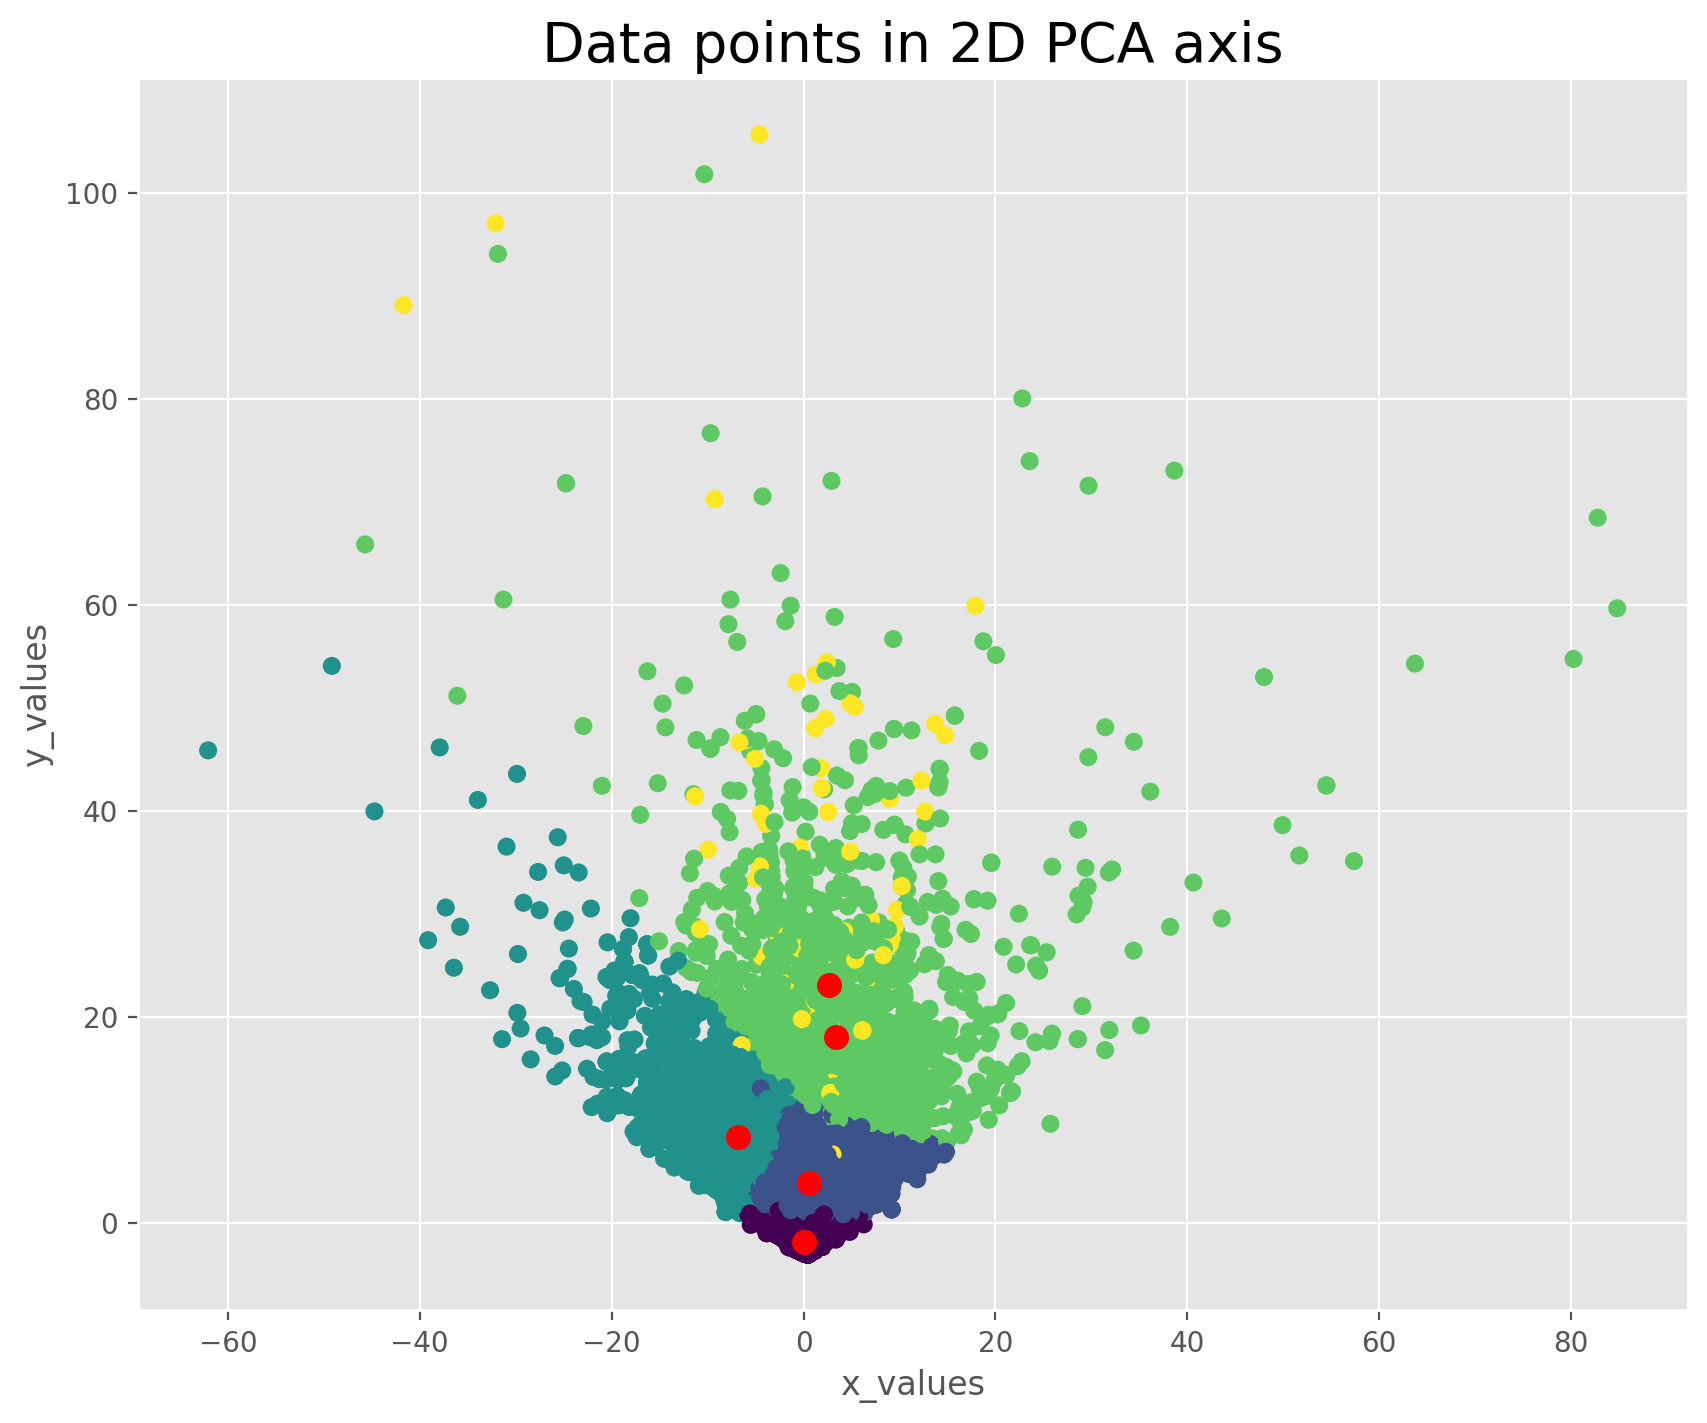

In [112]:
fig = plt.figure(figsize=(10,8))
plt.scatter(food_tocluster[1], food_tocluster[0], c = predicted)
for ci,c in enumerate(model.cluster_centers_):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()